<a href="https://colab.research.google.com/github/IshwaryaSriram/EfficentNet-ImageClassification/blob/main/BrainTumor/BrainTumorDataProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading the Dataset from Kaggle and preprocessing


In [ ]:
from google.colab import files
files.upload()

In [ ]:
#setting up required directory to access kaggle dataset
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!pip install --upgrade --force-reinstall --no-deps kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 58 kB 4.4 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73051 sha256=3e43a2dac772b86da98ef05a84da5177f45df1eaf64879c88d2dfed16b09ed2f
  Stored in directory: /root/.cache/pip/wheels/62/d6/58/5853130f941e75b2177d281eb7e44b4a98ed46dd155f556dc5
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [ ]:
!kaggle datasets download -d iashiqul/brain-tumor-mri-image-classification

 82% 75.0M/91.5M [00:00<00:00, 164MB/s]
100% 91.5M/91.5M [00:00<00:00, 151MB/s]


In [ ]:
#extracting data from zip file
import zipfile
zip_ref = zipfile.ZipFile('brain-tumor-mri-image-classification.zip', 'r')
zip_ref.extractall('files')
zip_ref.close()

In [ ]:
cd /content/files

/content/files


In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
#importing necessary libraries
import numpy as np # linear algebra
import pandas as pd # data processing
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
%load_ext tensorboard
import datetime, os
from tensorflow.keras import layers
import random
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers.experimental import preprocessing
from keras.preprocessing.image import ImageDataGenerator
from sklearn.utils.multiclass import unique_labels
import matplotlib.image as mpimg
import seaborn as sns
import itertools
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras import Sequential
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD,Adam
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Flatten,Dense,BatchNormalization,Activation,Dropout
from tensorflow.keras.utils import to_categorical
import PIL
import PIL.Image

Data Analysis

In [ ]:
!ls 'Brain Tumor MRI Classfication'/Training

glioma_tumor  meningioma_tumor	no_tumor  pituitary_tumor


In [ ]:
!cd /content/files/'Brain Tumor MRI Classfication'

In [ ]:
!mv /content/files/Brain\ Tumor\ MRI\ Classfication /content/files/BrainTumorMRIClassfication

In [ ]:
!pwd

/content/files


In [ ]:
!cd /content/files/BrainTumorMRIClassfication
train_size = len(os.listdir('/content/files/BrainTumorMRIClassfication/Training/glioma_tumor')) + len(os.listdir('/content/files/BrainTumorMRIClassfication/Training/meningioma_tumor')) + len(os.listdir('/content/files/BrainTumorMRIClassfication/Training/no_tumor')) + len(os.listdir('/content/files/BrainTumorMRIClassfication/Training/pituitary_tumor')) 


In [ ]:
print(train_size)

2870


In [ ]:
!cd /content/files/BrainTumorMRIClassfication
val_size = len(os.listdir('/content/files/BrainTumorMRIClassfication/Validation/glioma_tumor')) +  len(os.listdir('/content/files/BrainTumorMRIClassfication/Validation/meningioma_tumor')) + len(os.listdir('/content/files/BrainTumorMRIClassfication/Validation/no_tumor')) + len(os.listdir('/content/files/BrainTumorMRIClassfication/Validation/pituitary_tumor')) 

In [ ]:
!cd /content/files/BrainTumorMRIClassfication
test_size = len(os.listdir('/content/files/BrainTumorMRIClassfication/Testing/glioma_tumor')) + len(os.listdir('/content/files/BrainTumorMRIClassfication/Testing/meningioma_tumor')) + len(os.listdir('/content/files/BrainTumorMRIClassfication/Testing/no_tumor')) + len(os.listdir('/content/files/BrainTumorMRIClassfication/Testing/pituitary_tumor')) 

In [ ]:
print(train_size, test_size, val_size)

2870 394 179


In [ ]:
print(len(train_images),len(test_images),len(validation_images))

2870 394 179


Train Images 
[[img, label]]

In [ ]:
train_images = []
# np.empty((train_size, 22, 225), dtype=np.float32)
train_labels =[]
i = 0
for data in os.listdir('/content/files/BrainTumorMRIClassfication/Training/glioma_tumor'):
        img_d = cv2.imread('/content/files/BrainTumorMRIClassfication/Training/glioma_tumor/{}'.format(data))
        img_d = cv2.resize(img_d, (224, 224))
        img_d = cv2.cvtColor(img_d, cv2.COLOR_BGR2GRAY)
        # img_d = cv2.cvtColor(img_d, cv2.COLOR_BGR2LAB)
        if img_d is not None:    
            train_images.append([img_d,1])      
            # train_images[i] = img_d
            # train_labels.append([1])
        
        i+=1

i = 0
for data in os.listdir('/content/files/BrainTumorMRIClassfication/Training/meningioma_tumor'):
        img_d = cv2.imread('/content/files/BrainTumorMRIClassfication/Training/meningioma_tumor/{}'.format(data))
        img_d = cv2.resize(img_d, (224, 224))
        img_d = cv2.cvtColor(img_d, cv2.COLOR_BGR2GRAY)
        # img_d = cv2.cvtColor(img_d, cv2.COLOR_BGR2LAB)
        if img_d is not None:            
            train_images.append([img_d,2]) 
            # train_images[i] = img_d
            # train_labels.append([2])
        
        i+=1

i = 0
for data in os.listdir('/content/files/BrainTumorMRIClassfication/Training/no_tumor'):
        img_d = cv2.imread('/content/files/BrainTumorMRIClassfication/Training/no_tumor/{}'.format(data))
        img_d = cv2.resize(img_d, (224, 224))
        img_d = cv2.cvtColor(img_d, cv2.COLOR_BGR2GRAY)
        # img_d = cv2.cvtColor(img_d, cv2.COLOR_BGR2LAB)
        if img_d is not None:            
            train_images.append([img_d,0]) 
            # train_images[i] = img_d
            # train_labels.append([0])
        
        i+=1

i = 0
for data in os.listdir('/content/files/BrainTumorMRIClassfication/Training/pituitary_tumor'):
        img_d = cv2.imread('/content/files/BrainTumorMRIClassfication/Training/pituitary_tumor/{}'.format(data))
        img_d = cv2.resize(img_d, (224, 224))
        img_d = cv2.cvtColor(img_d, cv2.COLOR_BGR2GRAY)
        # img_d = cv2.cvtColor(img_d, cv2.COLOR_BGR2LAB)
        if img_d is not None:        
            train_images.append([img_d,3])   
            # train_images[i] = img_d
            # train_labels.append([3])
        
        i+=1


Test Images [[img,labels]]

In [ ]:
test_images = []
# np.empty((train_size, 225, 225), dtype=np.float32)
# train_labels =[]
i = 0
for data in os.listdir('/content/files/BrainTumorMRIClassfication/Testing/glioma_tumor'):
        img_d = cv2.imread('/content/files/BrainTumorMRIClassfication/Testing/glioma_tumor/{}'.format(data))
        img_d = cv2.resize(img_d, (224, 224))
        img_d = cv2.cvtColor(img_d, cv2.COLOR_BGR2GRAY)
        # img_d = cv2.cvtColor(img_d, cv2.COLOR_BGR2LAB)
        if img_d is not None:    
            test_images.append([img_d,1])      
            # train_images[i] = img_d
            # train_labels.append([1])
        
        i+=1

i = 0
for data in os.listdir('/content/files/BrainTumorMRIClassfication/Testing/meningioma_tumor'):
        img_d = cv2.imread('/content/files/BrainTumorMRIClassfication/Testing/meningioma_tumor/{}'.format(data))
        img_d = cv2.resize(img_d, (224, 224))
        img_d = cv2.cvtColor(img_d, cv2.COLOR_BGR2GRAY)
        # img_d = cv2.cvtColor(img_d, cv2.COLOR_BGR2LAB)
        if img_d is not None:            
            test_images.append([img_d,2]) 
            # train_images[i] = img_d
            # train_labels.append([2])
        
        i+=1

i = 0
for data in os.listdir('/content/files/BrainTumorMRIClassfication/Testing/no_tumor'):
        img_d = cv2.imread('/content/files/BrainTumorMRIClassfication/Testing/no_tumor/{}'.format(data))
        img_d = cv2.resize(img_d, (224, 224))
        img_d = cv2.cvtColor(img_d, cv2.COLOR_BGR2GRAY)
        # img_d = cv2.cvtColor(img_d, cv2.COLOR_BGR2LAB)
        if img_d is not None:            
            test_images.append([img_d,0]) 
            # train_images[i] = img_d
            # train_labels.append([0])
        
        i+=1

i = 0
for data in os.listdir('/content/files/BrainTumorMRIClassfication/Testing/pituitary_tumor'):
        img_d = cv2.imread('/content/files/BrainTumorMRIClassfication/Testing/pituitary_tumor/{}'.format(data))
        img_d = cv2.resize(img_d, (224, 224))
        img_d = cv2.cvtColor(img_d, cv2.COLOR_BGR2GRAY)
        # img_d = cv2.cvtColor(img_d, cv2.COLOR_BGR2LAB)
        if img_d is not None:        
            test_images.append([img_d,3])   
            # train_images[i] = img_d
            # train_labels.append([3])
        
        i+=1


Validation Images [[img,label]]

In [ ]:
validation_images = []
# np.empty((train_size, 225, 225), dtype=np.float32)
# train_labels =[]
i = 0
for data in os.listdir('/content/files/BrainTumorMRIClassfication/Validation/glioma_tumor'):
        img_d = cv2.imread('/content/files/BrainTumorMRIClassfication/Validation/glioma_tumor/{}'.format(data))
        img_d = cv2.resize(img_d, (224, 224))
        img_d = cv2.cvtColor(img_d, cv2.COLOR_BGR2GRAY)
        # img_d = cv2.cvtColor(img_d, cv2.COLOR_BGR2LAB)
        if img_d is not None:    
            validation_images.append([img_d,1])      
            # train_images[i] = img_d
            # train_labels.append([1])
        
        i+=1

i = 0
for data in os.listdir('/content/files/BrainTumorMRIClassfication/Validation/meningioma_tumor'):
        img_d = cv2.imread('/content/files/BrainTumorMRIClassfication/Validation/meningioma_tumor/{}'.format(data))
        img_d = cv2.resize(img_d, (224, 224))
        img_d = cv2.cvtColor(img_d, cv2.COLOR_BGR2GRAY)
        # img_d = cv2.cvtColor(img_d, cv2.COLOR_BGR2LAB)
        if img_d is not None:            
            validation_images.append([img_d,2]) 
            # train_images[i] = img_d
            # train_labels.append([2])
        
        i+=1

i = 0
for data in os.listdir('/content/files/BrainTumorMRIClassfication/Validation/no_tumor'):
        img_d = cv2.imread('/content/files/BrainTumorMRIClassfication/Validation/no_tumor/{}'.format(data))
        img_d = cv2.resize(img_d, (224, 224))
        img_d = cv2.cvtColor(img_d, cv2.COLOR_BGR2GRAY)
        # img_d = cv2.cvtColor(img_d, cv2.COLOR_BGR2LAB)
        if img_d is not None:            
            validation_images.append([img_d,0]) 
            # train_images[i] = img_d
            # train_labels.append([0])
        
        i+=1

i = 0
for data in os.listdir('/content/files/BrainTumorMRIClassfication/Validation/pituitary_tumor'):
        img_d = cv2.imread('/content/files/BrainTumorMRIClassfication/Validation/pituitary_tumor/{}'.format(data))
        img_d = cv2.resize(img_d, (224, 224))
        img_d = cv2.cvtColor(img_d, cv2.COLOR_BGR2GRAY)
        # img_d = cv2.cvtColor(img_d, cv2.COLOR_BGR2LAB)
        if img_d is not None:        
            validation_images.append([img_d,3])   
            # train_images[i] = img_d
            # train_labels.append([3])
        
        i+=1


Sample Images in the dataset

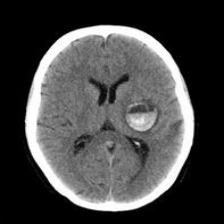

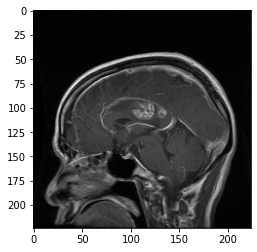

In [ ]:
cv2_imshow(test_images[0][0])
plt.imshow(train_images[0][0],cmap='gray')
# train_labels[0]

In [ ]:
type(train_images)

list

Saving images as numpy arrays to drive

In [ ]:
images = [train_images, test_images, validation_images]

In [ ]:
from google.colab import  drive
drive.mount('/drive')

Mounted at /drive


In [ ]:
for image in images:
  random.shuffle(image)
  X_img = []
  Y_lab = []
  for data in image:
      X_img.append(data[0])
      Y_lab.append(data[1])
  if image == train_images:
    X_train = np.array(X_img)
    y_train = np.array(Y_lab)
    np.save("/drive/MyDrive/DLBrainTumor/X_train",X_train)
    np.save("/drive/MyDrive/DLBrainTumor/y_train",y_train)
  elif image == test_images:
    X_test = np.array(X_img)
    y_test = np.array(Y_lab)
    np.save("/drive/MyDrive/DLBrainTumor/X_test",X_test)
    np.save("/drive/MyDrive/DLBrainTumor/y_test",y_test)
  if image == validation_images:
    X_val = np.array(X_img)
    y_val = np.array(Y_lab)
    np.save("/drive/MyDrive/DLBrainTumor/X_val",X_val)
    np.save("/drive/MyDrive/DLBrainTumor/y_val",y_val)